# Incidence Matrices for quasi-cords

## Import modules

In [4]:
import Permutations as pm
from ToolsForQuasiCord import *

In [16]:
def cc(sqr):
    return len(pm.cycle_decomp(sqr.permutation()))

## Finding moves keeping number of components

### To be $T+L = B+R$

In [17]:
N = 50
equals,alters,errors = 0,0,0
for i in range(N):
    sqr_org = square_random_generator(max=20)
    c_org = sqr_org.code
    
    diff = (c_org[0]+c_org[1])-(c_org[2]+c_org[3])
    c_alt = [c_org[0], c_org[1]+diff, c_org[2], c_org[3]]
    
    flag = True
    try:
        sqrs = [sqr_org, Square(c_alt)]
    except:
        errors += 1
        flag = False
        pass
    nums = [cc(sqr) for sqr in sqrs]
    
    if flag:
        if nums[0] == nums[1]:
            equals += 1
        else:
            alters += 1
print("eql = {}, alt = {}, err = {}".format(equals, alters, errors))        
#     print([sqr.code for sqr in sqrs],nums)
#     for i in range(2): display(get_diagram(sqrs[i].grid_diagram()))

eql = 19, alt = 19, err = 12


### $T=L$

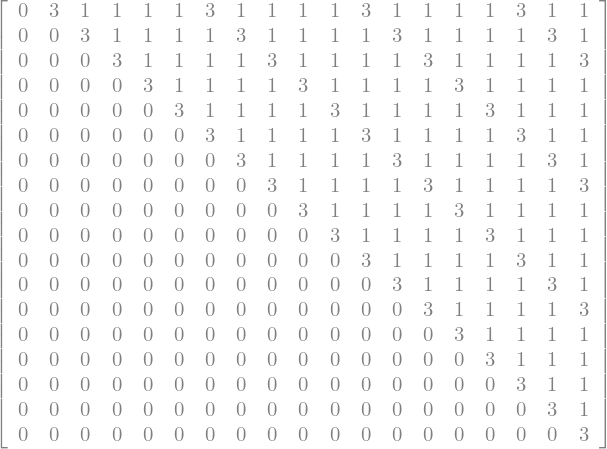

In [21]:
N=20
k = 2
mat = []
for r in range(k,N):
    seq = []
    for t in range(1,N):
        flag = True
        try:
            sqr = Square([t,t,t-r,k])
        except: 
            flag = False
        #---
        if flag:
            num = cc(sqr)
        else: num = 0
        seq += [num]
    mat += [seq]
#     print("{},r={}".format(seq,r))
display(sympy.Matrix(mat))

In [19]:
N=500
M=50
for i in tqdm(range(N)):
    r = np.random.randint(1,M)
    b = np.random.randint(1,M)
    t = (b+r) + np.random.randint(1,M)
    try:
        sqrs = [Square([t,t,b,r]), Square([t+1,t+1,b,r])]
    except: pass
    nums = [cc(sqr) for sqr in sqrs]
    if nums[0] != nums[1]:
#        print(f"{nums},(b,r,t)=({b},{r},{t})")
        print(f"{nums},(t,b+r)=({t},{b+r})")

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
N=500
M=50
for i in tqdm(range(N)):
    t = np.random.randint(3,M)
    b = np.random.randint(1,t-1)
    r = np.random.randint(1,t-b)
    try:
        sqrs = [Square([t,t,b,r]), Square([t+1,t+1,b,r])]
    except: pass
    nums = [cc(sqr) for sqr in sqrs]
    if nums[0] != nums[1]:
#        print(f"{nums},(b,r,t)=({b},{r},{t})")
        print(f"{nums},(t,b+r)=({t},{b+r})")

### Increase numbers of 4-tuple

#### Increase $T$ and $L$

In [20]:
sqr_org = square_random_generator(max=8)
c = sqr_org.code
print(c)

mat = []

N=20
for i in range(N):
    seq = []
    for j in range(N):
        flag = True
        try:
            sqr = Square([c[0]+i, c[1]+j, c[2], c[3]])
        except: 
            flag = False
        #---
        if flag:
            num = cc(sqr)
        else: num = 0
        seq += [num]
    mat += [seq]
    print("{}".format(seq))
    
print("\n")
for i in range(N):
    if mat[i][0] > 0:
        seq = [mat[i+k][k] for k in range(N-i)]
        print(seq)
for j in range(1,N):
    if mat[0][j] > 0:
        seq = [mat[k][k+j] for k in range(N-j)]
        print(seq)

(2, 7, 4, 4)
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 3, 3, 4, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 2, 1, 1, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 2, 5, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 2, 3, 4, 5, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 4, 1, 3, 1, 1, 1, 0, 0, 0]
[0, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 3, 1, 1, 0]
[0, 0, 0, 1

In [ ]:
i,j = 0,5
N=200
seq = []
errors = 0
for k in tqdm(range(N)):
    r = np.random.randint(N)
    r -= min(c[:2])
    flag = True
    try:
        sqr = Square([c[0]+i+r, c[1]+j+r, c[2], c[3]])
    except:
        errors += 1
        flag = False
    #---
    if flag:
        num = cc(sqr)
        if num != 1:
            print("{},{}".format(sqr.code,num))
print("err:", errors)

#### Increase all digits

In [22]:
sqr_org = square_random_generator(max=12)
c = sqr_org.code
print(c)

mat = []

N=20
for i in range(N):
    seq = []
    for j in range(N):
        flag = True
        try:
            sqr = Square([c[0]+i, c[1]+j, c[2]+j, c[3]+i])
        except: 
            flag = False
        #---
        if flag:
            num = cc(sqr)
        else: num = 0
        seq += [num]
    mat += [seq]
    print("{}".format(seq))
    
print("\n")
for i in range(N):
    if mat[i][0] > 0:
        seq = [mat[i+k][k] for k in range(N-i)]
        print(seq)
for j in range(1,N):
    if mat[0][j] > 0:
        seq = [mat[k][k+j] for k in range(N-j)]
        print(seq)

(9, 3, 1, 9)
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3]
[1, 1, 1, 1

In [23]:
i,j = 4,0
N=200
seq = []
errors = 0
for k in tqdm(range(N)):
    r = np.random.randint(N)
    r -= min(c[:2])
    flag = True
    try:
        sqr = Square([c[0]+i+r, c[1], c[2]+j+r, c[3]])
    except:
        errors += 1
        flag = False
    #---
    if flag:
        num = cc(sqr)
        if num != 1:
            print("{},{}".format(sqr.code,num))
print("err:", errors)

  0%|          | 0/200 [00:00<?, ?it/s]

(99, 3, 87, 9),2
(74, 3, 62, 9),2
(134, 3, 122, 9),2
(173, 3, 161, 9),2
(71, 3, 59, 9),2
(207, 3, 195, 9),2
(130, 3, 118, 9),2
(95, 3, 83, 9),2
(134, 3, 122, 9),2
(18, 3, 6, 9),2
(18, 3, 6, 9),2
(123, 3, 111, 9),2
(172, 3, 160, 9),2
(40, 3, 28, 9),2
(57, 3, 45, 9),2
(131, 3, 119, 9),2
(169, 3, 157, 9),2
(74, 3, 62, 9),2
(144, 3, 132, 9),2
(190, 3, 178, 9),2
(22, 3, 10, 9),2
(134, 3, 122, 9),2
(123, 3, 111, 9),2
(106, 3, 94, 9),2
(134, 3, 122, 9),2
(116, 3, 104, 9),2
(187, 3, 175, 9),2
(26, 3, 14, 9),2
(137, 3, 125, 9),2
(116, 3, 104, 9),2
(75, 3, 63, 9),2
(53, 3, 41, 9),2
(102, 3, 90, 9),2
(166, 3, 154, 9),2
(29, 3, 17, 9),2
(204, 3, 192, 9),2
(138, 3, 126, 9),2
(207, 3, 195, 9),2
(197, 3, 185, 9),2
(33, 3, 21, 9),2
(131, 3, 119, 9),2
(145, 3, 133, 9),2
(95, 3, 83, 9),2
(71, 3, 59, 9),2
(71, 3, 59, 9),2
(110, 3, 98, 9),2
(67, 3, 55, 9),2
(165, 3, 153, 9),2
(99, 3, 87, 9),2
(64, 3, 52, 9),2
(117, 3, 105, 9),2
(152, 3, 140, 9),2
(131, 3, 119, 9),2
(29, 3, 17, 9),2
(26, 3, 14, 9),2
(120, 

## Sequences of Number of Components

__Note:__ 
* quasi-cord を与える 4-tuple を Code と呼ぶ。Code には以下のルールがある。
$$
|T-L|-e <= B+R <= T+L,
$$
ここで、$e$ は $T=0$ のときは $0$ で、それ以外では $1$.

__TODO:__ 本当に上記の条件で完全か、検証が必要。

### $0$ が3つ、および2つの場合の考察:

* 0 が3つなら trivial cord.
```
proof) T=L=B=0 の場合、Code rule より R <= 0  i.e., R=0. 他も同様。
```
* 2つが $0$ のとき、
    * $T=L=0$ なら trivial cord.
    ```
    proof) Code rule より B+R <= 0  => B=R=0.
    ```        
    * その他では、$0$ でない2つの値は同じ。
    ```
    proof) case 1: T=0, B=0  --> L-1 <= R <=L  => L=R,
    case 2: T=0, R=0  --> L < B =< L  => L=B,
    case 3: L=0, B=0  --> T < R =< T  => T=R,
    case 4: L=0, R=0  --> T < B =< T  => T=B,
    case 5: B=0, R=0  --> |T-L| < 0 0, T =< L, L =< T  => T=L. 
    ```

__予想 3:__ $T,L,B,R$ のうちの 2つが $0$ の Code から得られる quasi-cord は cord.

--> (0,k,0,k) のとき以外は正しそう。(0,k,0,k) のときは、逆に全く cord にならないようだ。

    --> (0,k,0,k) のときは、segments が全て上辺・下辺に平行となる。よって、$k$ 個のループと1つのアーク($L$ と $R$ を直接つなぐ)となる。
    --> そういえば、この場合は3点穴付き円盤上の quasi-cord であり、全て cord であることが示されているんだった。

In [26]:
seq = []
N=50
for k in range(1,N):
    sqr = Square([k,k,0,0])
#     display(sqr.permutation())
    seq += [cc(sqr)]
#     M = sqr.grid_diagram()
#     D = get_diagram(M)
#     display(D)
print(seq)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [28]:
seq = []
N=50
for k in range(1,N):
    sqr = Square([0,k,0,k])
    seq += [cc(sqr)]
print(seq)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


### 1つだけが $0$ の場合の考察

* T=0
```
1) L >= B+R
2) 0 <= L+B+R
3) L <= B+R
```
=> L = B+R.
* L=0
```
1) T >= B+R
2) 0 <= L+B+R
3) T <= B+R
```
=> T = B+R.
* R=0
```
1) T+L >= B
2) T <= L+B
3) L <= T+B
```
=> ???

__予想 4:__ R=0 の場合、
* (l,k,k,0) は常に cord.
* (k,k+i,k,0) の成分数は $i+1$.

In [29]:
N=30
for s in range(1,N-10):
    seq = []
    for k in range(s+1,N+s):
        sqr = Square([k,s,0,k-s]) #Square([k,s,k,0])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[k,{},0,k-{}] |-> {}".format(s,s,seq))

[k,1,0,k-1] |-> [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[k,2,0,k-2] |-> [2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3]
[k,3,0,k-3] |-> [2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2]
[k,4,0,k-4] |-> [2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2]
[k,5,0,k-5] |-> [2, 3, 2, 2, 6, 2, 2, 3, 2, 2, 3, 2, 2, 6, 2, 2, 3, 2, 2, 3, 2, 2, 6, 2, 2, 3, 2, 2, 3]
[k,6,0,k-6] |-> [2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2]
[k,7,0,k-7] |-> [2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[k,8,0,k-8] |-> [2, 3, 4, 2, 3, 2, 2, 9, 2, 2, 3, 2, 4, 3, 2, 2, 3, 4, 2, 3, 2, 2, 9, 2, 2, 3, 2, 4, 3]
[k,9,0,k-9] |-> [2, 2, 2, 2, 2, 2, 2, 2, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 10, 2, 2, 2]
[k,10,0,k-10] |-> [2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 2, 2, 2, 2, 

In [30]:
N=100
cord = 0
err = 0
for i in range(N):
    t = np.random.randint(1,N)
    l = np.random.randint(2,N)
    r = np.random.randint(abs(t-l),t+l+1)
    
    flag = True
    try:
        code = [t,l,0,r]
        sqr = Square(code)
    except:
        flag = False
        err += 1
    if flag:
        num = cc(sqr)
        if num == 1:
            cord += 1
            print("{},{},{}".format(sqr.code,num,abs(r-l)==t))
        else:
            pass #print("{},{}".format(sqr.code,num))
print("cords: {}, errors:{}".format(cord,err))

(14, 68, 0, 54),1,True
(2, 61, 0, 63),1,True
(1, 39, 0, 40),1,True
cords: 3, errors:0


In [31]:
N=30
cord = 0
err = 0
for i in range(N):
    t = np.random.randint(1,N)
    l = np.random.randint(2,N)
    r = np.random.randint(abs(t-l),t+l+1)
    
    x = r-abs(t-l)+1
    y = t-abs(l-r)+1
    
    flag = True
    try:
        code = [t,l,0,r]
        sqr = Square(code)
    except:
        flag = False
        err += 1
    if flag:
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
        num = cc(sqr)
        if not num == 1:
            cord +=1
            if x == y:
                print("x=y,{},{},y={},{}".format(sqr.code,num,y,t==abs(l-r)))
            else:
                print("{},{},y={},{}".format(sqr.code,num,y,t==abs(l-r)))
print("cords: {}, errors:{}".format(cord,err))

(18, 15, 0, 3),2,y=7,False
x=y,(14, 18, 0, 10),7,y=7,False
(13, 22, 0, 33),3,y=3,False
(20, 8, 0, 14),4,y=15,False
x=y,(3, 25, 0, 22),2,y=1,True
(21, 29, 0, 47),4,y=4,False
x=y,(11, 18, 0, 13),9,y=7,False
(29, 16, 0, 26),17,y=20,False
x=y,(25, 29, 0, 9),6,y=6,False
x=y,(8, 27, 0, 27),28,y=9,False
(10, 27, 0, 33),5,y=5,False
(24, 14, 0, 34),5,y=5,False
(11, 19, 0, 25),6,y=6,False
x=y,(12, 15, 0, 11),9,y=9,False
(29, 10, 0, 20),3,y=20,False
(8, 21, 0, 27),4,y=3,False
(24, 16, 0, 36),7,y=5,False
(23, 5, 0, 27),2,y=2,False
(23, 4, 0, 20),3,y=8,False
(15, 27, 0, 40),3,y=3,False
(23, 10, 0, 29),5,y=5,False
x=y,(21, 24, 0, 5),3,y=3,False
(7, 6, 0, 10),4,y=4,False
(21, 15, 0, 33),4,y=4,False
cords: 24, errors:0


__予想 6:__ $T > 0$ とするとき、$[T,L,0,R]$ が cord $\Longleftrightarrow$ $T=|L-R|$

In [ ]:
N=30
for s in range(1,N-10):
    seq = []
    for k in range(s+1,N+s):
        sqr = Square([0,k,s,k-s]) #Square([k,s,k,0])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#        sigma.display()
#        display(D)
        seq += [cc(sqr)]
    print("[0,k,{},k-{}] |-> {}".format(s,s,seq))

In [ ]:
N=30
for s in range(1,N-10):
    seq = []
    for k in range(1,N-10):
        sqr = Square([k,s,k+s,0])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#        sigma.display()
#        display(D)
        seq += [cc(sqr)]
    print("[k,{},k+{},0] |-> {}".format(s,s,seq))

In [32]:
N=20
cord = 0
err = 0
for i in range(N):
    t = np.random.randint(1,N)
    l = np.random.randint(2,N)
    r = np.random.randint(abs(t-l),t+l+1)
    
    x = r-abs(t-l)
    y = t-abs(l-r)
    
    flag = True
    try:
        code = [t,l,1,r]
        sqr = Square(code)
    except:
        flag = False
        err += 1
    if flag:
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
        num = cc(sqr)
        if num == 1:
            cord +=1
            print("{},{},(x,y)=({},{})".format(sqr.code,num,x,y))
print("cords: {}, errors:{}".format(cord,err))

(19, 13, 1, 12),1,(x,y)=(6,18)
(19, 3, 1, 18),1,(x,y)=(2,4)
(8, 5, 1, 10),1,(x,y)=(7,3)
(5, 3, 1, 6),1,(x,y)=(4,2)
(8, 3, 1, 7),1,(x,y)=(2,4)
(18, 4, 1, 21),1,(x,y)=(7,1)
(12, 14, 1, 19),1,(x,y)=(17,7)
(18, 13, 1, 6),1,(x,y)=(1,11)
(6, 10, 1, 7),1,(x,y)=(3,3)
(8, 8, 1, 5),1,(x,y)=(5,5)
(1, 5, 1, 4),1,(x,y)=(0,0)
(11, 19, 1, 9),1,(x,y)=(1,1)
(11, 2, 1, 11),1,(x,y)=(2,2)
cords: 13, errors:3


### $0$ がない場合の考察:

#### $T$=1 としてみる:

    ```
    1) L+1 >= B+R (>2)
    2) 1-L <= B+R 
    3) L-1 <= B+R
    ```

In [34]:
N=30
for s in range(1,N-10):
    seq = []
    for k in range(1,s+1):
        sqr = Square([s,s,k,k])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[{},{},k,k] |-> {}".format(s,s,seq))

[1,1,k,k] |-> [1]
[2,2,k,k] |-> [1, 1]
[3,3,k,k] |-> [1, 1, 1]
[4,4,k,k] |-> [1, 1, 2, 1]
[5,5,k,k] |-> [1, 1, 1, 1, 1]
[6,6,k,k] |-> [1, 1, 1, 2, 1, 1]
[7,7,k,k] |-> [1, 1, 1, 1, 3, 2, 1]
[8,8,k,k] |-> [1, 1, 1, 1, 2, 2, 1, 1]
[9,9,k,k] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1]
[10,10,k,k] |-> [1, 1, 1, 1, 1, 2, 2, 1, 2, 1]
[11,11,k,k] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[12,12,k,k] |-> [1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1]
[13,13,k,k] |-> [1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1]
[14,14,k,k] |-> [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1]
[15,15,k,k] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1]
[16,16,k,k] |-> [1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1]
[17,17,k,k] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1]
[18,18,k,k] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
[19,19,k,k] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1]


#### $B=R=1$ としてみる:

```
1) T+L >= 2
2) T-L <= 2
3) L-T <= 2
```

In [36]:
N=30
for t in range(1,N):
    seq = []
    for d in range(3):
        l = t+d
        sqr = Square([t,l,1,1])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[{},L,1,1] |-> {}".format(t,seq))

[1,L,1,1] |-> [1, 1, 3]
[2,L,1,1] |-> [1, 2, 1]
[3,L,1,1] |-> [1, 1, 1]
[4,L,1,1] |-> [1, 1, 1]
[5,L,1,1] |-> [1, 2, 1]
[6,L,1,1] |-> [1, 1, 3]
[7,L,1,1] |-> [1, 1, 1]
[8,L,1,1] |-> [1, 2, 1]
[9,L,1,1] |-> [1, 1, 1]
[10,L,1,1] |-> [1, 1, 1]
[11,L,1,1] |-> [1, 2, 3]
[12,L,1,1] |-> [1, 1, 1]
[13,L,1,1] |-> [1, 1, 1]
[14,L,1,1] |-> [1, 2, 1]
[15,L,1,1] |-> [1, 1, 1]
[16,L,1,1] |-> [1, 1, 3]
[17,L,1,1] |-> [1, 2, 1]
[18,L,1,1] |-> [1, 1, 1]
[19,L,1,1] |-> [1, 1, 1]
[20,L,1,1] |-> [1, 2, 1]
[21,L,1,1] |-> [1, 1, 3]
[22,L,1,1] |-> [1, 1, 1]
[23,L,1,1] |-> [1, 2, 1]
[24,L,1,1] |-> [1, 1, 1]
[25,L,1,1] |-> [1, 1, 1]
[26,L,1,1] |-> [1, 2, 3]
[27,L,1,1] |-> [1, 1, 1]
[28,L,1,1] |-> [1, 1, 1]
[29,L,1,1] |-> [1, 2, 1]


#### $T+L=B+R$ の場合:

* $L=B$ としてみる:

In [37]:
N=30
for tl in range(2,N):
    seq = []
    for t in range(2,tl+1):
        sqr = Square([t,tl-t,tl-t,t])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[T,{}-T,T,{}-T] |-> {}".format(tl,tl,seq))

[T,2-T,T,2-T] |-> [1]
[T,3-T,T,3-T] |-> [1, 1]
[T,4-T,T,4-T] |-> [1, 1, 1]
[T,5-T,T,5-T] |-> [1, 1, 1, 1]
[T,6-T,T,6-T] |-> [1, 1, 1, 1, 1]
[T,7-T,T,7-T] |-> [1, 1, 1, 1, 1, 1]
[T,8-T,T,8-T] |-> [1, 1, 1, 1, 1, 1, 1]
[T,9-T,T,9-T] |-> [1, 1, 1, 1, 1, 1, 1, 1]
[T,10-T,T,10-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,11-T,T,11-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,12-T,T,12-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,13-T,T,13-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,14-T,T,14-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,15-T,T,15-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,16-T,T,16-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,17-T,T,17-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,18-T,T,18-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,19-T,T,19-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,20-T,T,20-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[T,21-T,T,21-T] |-> [1, 1, 1, 1, 1, 1, 1, 1, 1,

__Note:__ $L=B+1$ の場合も全部 cord になるようだ。

* $L=B+2$ の場合:

In [ ]:
N=30
for tl in range(3,N):
    seq = []
    for t in range(1,tl-2):
        sqr = Square([t,tl-t,(tl-t)-2,t+2])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[T,{}-T,{}-T-2,T+2] |-> {}".format(tl,tl,seq))

* $L=B+3$ の場合:

In [ ]:
N=30
for tl in range(3,N):
    seq = []
    for t in range(1,tl-2):
        sqr = Square([t,tl-t,(tl-t)-3,t+3])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[T,{}-T,{}-T-2,T+2] |-> {}".format(tl,tl,seq))

__予想 5:__ $[T,tl-T,(tl-T)-k,T+k]$ の成分数は、$tl$, $k$ を固定したとき、$T$ には依らず一定。

In [ ]:
N = 10
k = np.random.randint(2,N)
tl = np.random.randint(k+3,N+k+3)

Ts = [np.random.randint(1,tl-k-1) for i in range(2)]
sqrs = [Square([T,tl-T,tl-T-k,T+k]) for T in Ts]
nums = [len(cycle_decomp(sqr.permutation())) for sqr in sqrs]

print([sqr.code for sqr in sqrs],nums)
for i in range(2): display(get_diagram(sqrs[i].grid_diagram()))

In [ ]:
N = 30
for i in tqdm(range(10)):
    k = np.random.randint(2,N)
    tl = np.random.randint(k+3,N+k+3)
    for j in range(100):
        Ts = [np.random.randint(1,tl-k-1) for i in range(2)]
        sqrs = [Square([T,tl-T,tl-T-k,T+k]) for T in Ts]
        nums = [len(cycle_decomp(sqr.permutation())) for sqr in sqrs]
        
        if nums[0] != nums[1]:
            print([sqr.code for sqr in sqrs],nums)

* $[1, L, L-k, 1+k]$ のラインナップ:

In [ ]:
N=20
for k in range(N):
    seq = []
    for tl in range(k,N+k):
        sqr = Square([1,tl,tl-k,1+k])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[1,L,L-{},1+{}] |-> {}".format(k,k,seq))

In [ ]:
N=20
for k in range(N):
    seq = []
    for tl in range(k,N+k):
        sqr = Square([tl,1,tl-k,1+k])
#         M = sqr.grid_diagram()
#         sigma = sqr.permutation()
#         D = get_diagram(M)
#         sigma.display()
#         display(D)
        seq += [cc(sqr)]
    print("[T,1,T-{},1+{}] |-> {}".format(k,k,seq))

### Others

In [ ]:
sqr = square_random_generator(verbose=False) #Square((0,1,1,0)) #
s = len(sqr.segments)

N = copy(sqr.matrix())
det0 = np.linalg.det(N)
N[s][s]=1
det1 = np.linalg.det(N)
print("{} --det0--> {} --det1--> {}".format(sqr.code, det0, det1))

In [ ]:
N = 10
k = np.random.randint(2,N)
tl = np.random.randint(k+3,N+k+3)

Ts = [np.random.randint(1,tl-k-1) for i in range(2)]
sqrs = [Square([T,tl-T,tl-T-k,T+k]) for T in Ts]
nums = [len(cycle_decomp(sqr.permutation())) for sqr in sqrs]

print([sqr.code for sqr in sqrs],nums)
for i in range(2): display(get_diagram(sqrs[i].grid_diagram()))

__予想 (Others):__ 右下を1にした行列の行列式は、もとの2倍である。

## TODO